In [1]:
# compare the outputs using different time steps
# change ATM_NCPL

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [11]:
ds1 = xr.load_dataset('/glade/scratch/guoqiang/CTSM_outputs/CAMELS_Calib/Lump_calib/archive/CAMELS_0_ts48/lnd/hist/CAMELS_0.clm2.h1.2000-01-01-00000.nc')
ds2 = xr.load_dataset('/glade/scratch/guoqiang/CTSM_outputs/CAMELS_Calib/Lump_calib/archive/CAMELS_0_ts24/lnd/hist/CAMELS_0.clm2.h1.2000-01-01-00000.nc')
ds3 = xr.load_dataset('/glade/scratch/guoqiang/CTSM_outputs/CAMELS_Calib/Lump_calib/archive/CAMELS_0_ts12/lnd/hist/CAMELS_0.clm2.h1.2000-01-01-00000.nc')

ds1['time'] = ds1.indexes['time'].to_datetimeindex()
ds2['time'] = ds2.indexes['time'].to_datetimeindex()
ds3['time'] = ds3.indexes['time'].to_datetimeindex()

ds1 = ds1.isel(lndgrid=0)
ds2 = ds2.isel(lndgrid=0)
ds3 = ds3.isel(lndgrid=0)


/glade/work/guoqiang/conda-envs/npl-2022b-tgq/lib/python3.8/site-packages/xarray/coding/times.py:360: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/glade/scratch/guoqiang/ipykernel_3051/809133284.py:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds1['time'] = ds1.indexes['time'].to_datetimeindex()
/glade/scratch/guoqiang/ipykernel_3051/809133284.py:6: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds2['time'] = ds2.indexes['time'].to_datetimeindex()
/glade/scratch/guoq

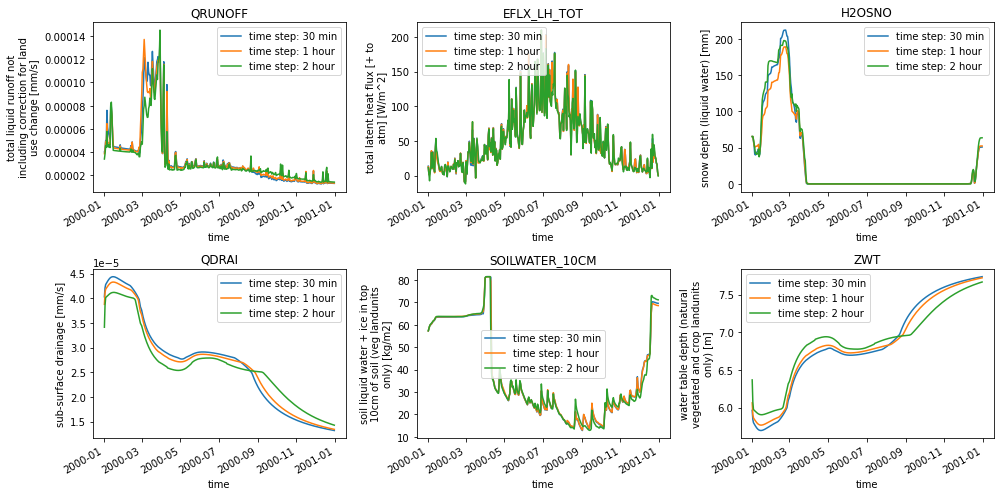

In [19]:
var = ['QRUNOFF','EFLX_LH_TOT', 'H2OSNO', 'QDRAI', 'SOILWATER_10CM', 'ZWT']

fig, axs = plt.subplots(2, 3, figsize=[14, 7])
axs = axs.flatten()

for i in range(len(var)):
    axi = axs[i]
    ds1[var[i]].isel(time=slice(1, 365)).plot(ax=axi, label='time step: 30 min')
    ds2[var[i]].isel(time=slice(1, 365)).plot(ax=axi, label='time step: 1 hour')
    ds3[var[i]].isel(time=slice(1, 365)).plot(ax=axi, label='time step: 2 hour')
    axi.set_title(var[i])
    axi.legend()

plt.tight_layout()
plt.show()
